# Evolve a Single Network.
**On the emergence of single versus multi-state allostery**. Eric Rouviere, Rama Ranganathan, Olivier Rivoire.

In this notebook we network we evolve and analyze a single network selected for cooperative allostery. Before begining install julia1.7.2 and install the packages PyPlot, LaTeXStrings, Revise.

### Load code

In [2]:
using Revise, PyPlot, Random, LinearAlgebra, SparseArrays, BenchmarkTools
path2src = "./src"
push!(LOAD_PATH, path2src)
using CoreFuncs
using Analysis
using Plot

### Define Parameters

In [3]:
println("Building System...")
S = Dict()
S["len"] = 7
S["wid"] = 7
S["rando"] = 0.1 # default 0.1

S["num_soft"] = 1
S["k_soft"] = 0.01 # stiffness of the soft interactions
S["E_soft"] = 0.00 

S["restLengthRange"] = 0.6 # restlengthRange/2 is called σ in the paper.
S["isRestLengthBlocky"] = false
S["sizeRestLengthBlock"] = 5
S["numTypes"] = 5 # number of bead types, denoted Q in the paper.

S["numEvoSteps"] = 100
S["GS_settings"] = (10, 10)
S["evoT"] = 0.001
S["sites"] = [[CartesianIndex(3,5)], [CartesianIndex(1,7)]]
S["unfoldedEnergy"] = Inf
S["suppFitnessParams"] = ()

S["assay"] = "Allostery"

S["ligs"] = [ Ligand([Bond(1.0,1.3,0.0)]), # solvent
              Ligand([Bond(1.0,1.9,0.0)]), # target ligand
              # If selecting for allostery, dont worry about the following 
              # three lines.
              Ligand([Bond(1.0,1.6,0.0)]), # wrong ligand
              Ligand([Bond(1.0,1.9,0.0)]), # surface solvent
              Ligand([Bond(1.0,1.9,0.0)])] # surface right] # wrong



Q = buildNetworkFromSettings(S);

Building System...


### Evolve a single network

This should take around 1 hour on 1 core if S["numEvoSteps"] = 500
 and S["GS_settings"] = (10, 100).
 
 To speed things up, set S["numEvoSteps"] = 100 and S["GS_settings"] = (10, 10). Should take around 1-2 minutes.

In [4]:
# this should take 
println("Evolving...")
@time Qs, energiesList, fits, evoSteps = evolve(Q, S["assay"],
                                  S["evoT"], S["numEvoSteps"],
                                  GS_settings=S["GS_settings"],
                                  showProgress = true)

Q0, Q1 = Qs[1], Qs[end]
energyArray = extractEnergyTrace(energiesList);

Evolving...
 68.600862 seconds (8.77 M allocations: 1.417 GiB, 0.41% gc time, 4.82% compilation time)


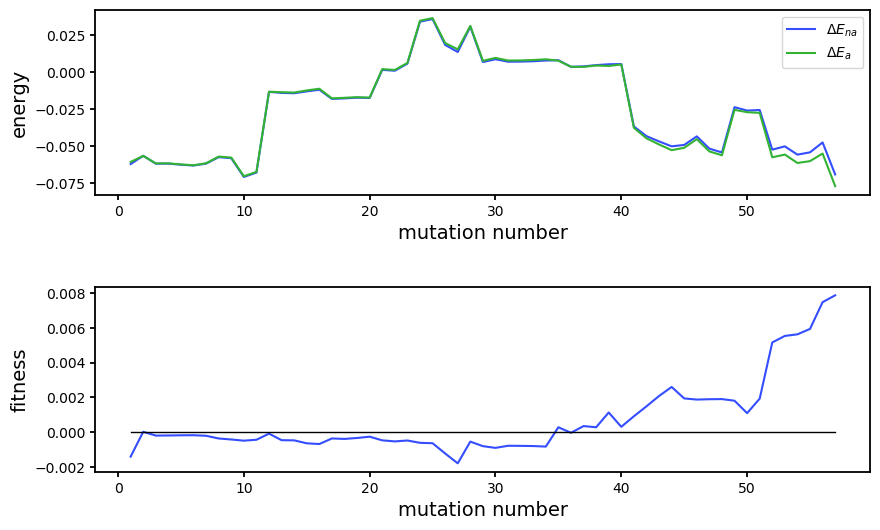

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/erouviere/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


In [5]:
# plot binding energies and fitness (cooperativity) as a function of mutations
fig = genEnergiesAlloFig(fits,energyArray[setLigDex(S["assay"]),:]);

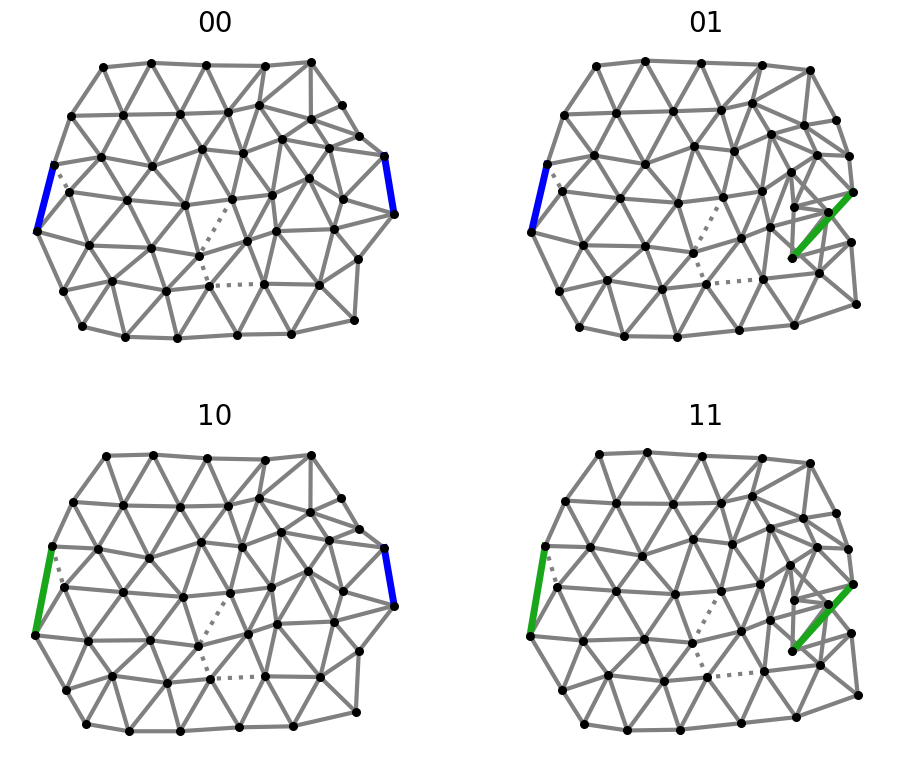

(Figure(PyObject <Figure size 1000x800 with 4 Axes>), "structs")

In [6]:
# Plot ground state structures
fig, _ = genStructsAlloFig(Q1, assay=S["assay"])

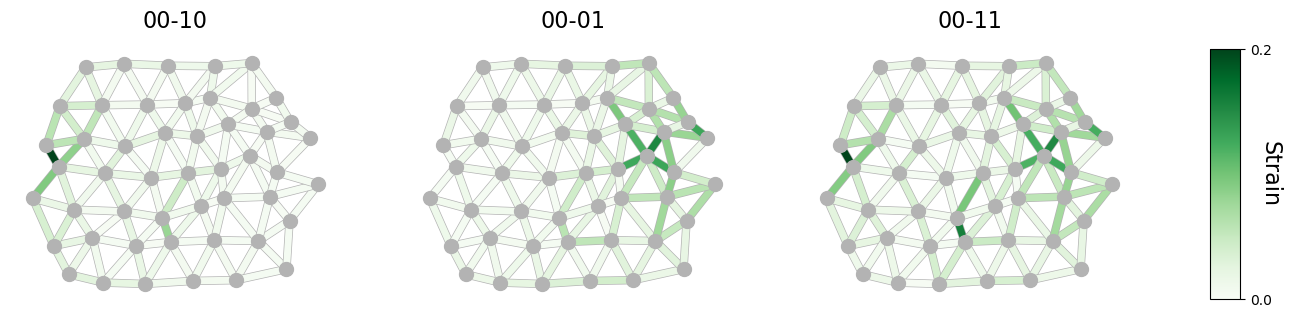

In [7]:
# Plot strain maps
fig, _ = genStrainAlloMapFig(Q1, colorTop=0.2, assay=S["assay"]);

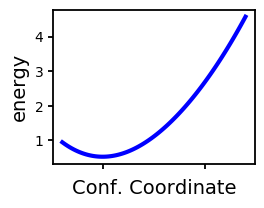

(Figure(PyObject <Figure size 260x200 with 1 Axes>), "energy_vs_confCoor")

In [8]:
fig, _ = genEnergyVsConfCoorFig2(Q1)

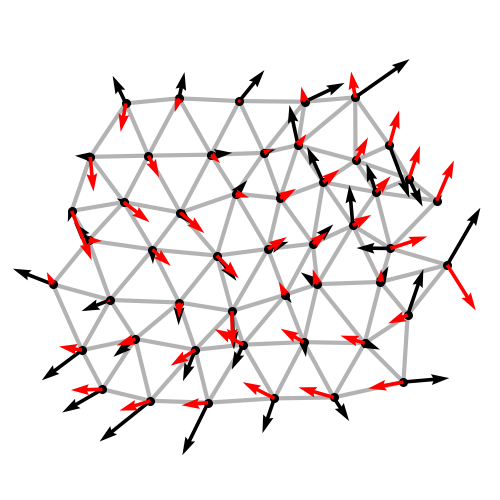

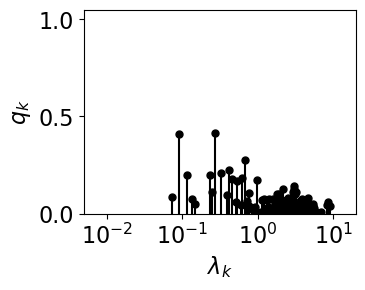

(Figure(PyObject <Figure size 600x600 with 1 Axes>), "softModeAlloModeMap", Figure(PyObject <Figure size 400x300 with 1 Axes>), "modeSpectrum")

In [9]:
# plot the allosteric displacement (black) and the softest mode (red)
# plot the overlap of the allosteric displacement and each normal mode.
fig1,_, fig2,_ = genStrainVsSoftModeFig(Q1)